# Data Science Interdisciplinary Report

In [1]:
from scipy.io import wavfile
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from IPython.display import Video
from data.Classifier1 import *
from IPython.display import Image
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing
from sklearn.model_selection import KFold
from sklearn import metrics
import difflib
import warnings
from difflib import SequenceMatcher
from matplotlib.collections import LineCollection
from sklearn.naive_bayes import MultinomialNB
from matplotlib.colors import ListedColormap
from IPython.display import Image
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import datasets
warnings.filterwarnings('ignore')

<img src="images/beginning.png" alt="Drawing" style="width: 500px; height: 400px;"/>

## Introduction

### <font color='#003399'>Background</font>

   The background of our game’s development stems from our key motivations which focus on increasing the accessibility of video games for those in the disability community, particularly individuals with physical disabilities. The EOG technology allows the brain waves resulting from left and right eye movement to be detected and transferred into a control for the games interface.
 
*EOG Technology*

   Eye tracking is becoming increasingly popular as an input medium for human computer operation and is specifically important for use in accessibility research.  More traditionally eye trackers have been hard to access due to their high costs, however cheaper technology is now being produced, meaning that new research projects and applications relying on this concept are beginning to become more prevalent. Thus, companies like Brainbox are producing high amounts of these spiker-boxes as research becomes for prevalent.
 
*Game*

   The game we have designed is loosely modelled off the 1978 Japanese Arcade Game, Space Invaders. The original format is relatively simple, using left and right key movements to dodge asteroids and shooting controls to shoot alien enemies. The simplicity of the original game was a useful tool in creating a game that is able to be controlled by these eye movements.
 
*Classifying Eye Movements*

   The background of the classifier stems from the creation of a model that is able to not only read the streaming wav data and classify it but do this at a fast-enough rate that the game can function properly. The classifier must initially identify when an event is occurring (as opposed to the individual just looking straight), then determine whether it is a left or right movement. Past research has been done to develop similar models to accurately detect eye tracker calibration. Harezlak, Kasprowski and Stasch in their paper Towards Accurate Eye Tracker Calibration – Methods and Procedures focus on different calibration techniques to ultimately map the output of an EEG. Further, other research has been conducted attempting to determine whether eye tracking is more accurate using signals from both eyes (electrodes) or just a single (Hooge, Holleman and Haukes, 2019).

### <font color='#003399'>Aim</font>

*Report*: The aim of this report is to describe the interdisciplinary activities undertaken to create our eye-movement controlled game ‘Space Battle.’.
 
*Data Science*: In terms of data science we aim to illustrate and assess the different models utilised to classify the eye-movements as well as the evaluation of these strategies. Through evaluating the accuracy and classification time of each of the classifiers we will be able to determine which model is best utilised when playing the game.
 
*Game Design*: We aim to produce a user-friendly game interface that is easily combined with the chosen classifier.
 
*Physics*: The aim in terms of physics of this report is to take biometric data from electrooculography (EOG) and provide a clean signal which can be used as an input for a game.

## Methodology

### <font color='#003399'>Data Collection</font>

#### Introduction of Device

The data collection device used was the Backyard Brains Heart and Brain Spikerbox. To use the device, one needs to place the headband such that the electrodes are positioned on either side of the eye, and add an electrode patch on the bony protrusion behind your ear. Then one must connect the electrodes and place the red alligator clips on the electrodes around the eye, and the black alligator clip on the ground behind the ear, finally one must plug the electrode cable wires in to the SpikerBox.


<img src="images/A.png" alt="Drawing" style="width: 300px; height: 300px;"/>

#### Physics

The interdisiciplinary nature of this project as well as the COVID-19 climate meant that only 1 physics student was able to use the Spiker Box, thus all the data collected came from that student. Furthermore, there was a large amount of noise generated from the recordings of the brain waves which had the potential to make the eye-movements amplituted unrecogniseable. To prevent this from occuring and to clean the signal, a Fourier Filter was used.

More simply, undesireable frequencies were removed using a low-pass filter of 8 Hz. The Fourier Transformation in this case is utilised by setting all frequencies above 8 Hz to 0. Following this, an inverse Fourier Transformation is used to restore the signal back to the original time domain. 

After performing the live testing of the filter, the physics students made the decision to change the low pass filter to 7Hz, which generated a better and clearer signal. Additionally, the issue of spikes apperaring in every window length in the filtered signal was solved by increasing the window for the Fourier filter process intially, and applying the process again after combining the second half of the previous window with the beginning and the first half of the next window, removing the edge spike.
 
Naturally it took our team a number of attempts in order to determine the most appropriate and accurate way to collect our data using the brain-box. We concluded that instead of using random movements, 4 different files would be uploaded and used. 

1. One where he looked straight for 5 seconds indicating no movement.
2. One where he looked right 5 times.
3. And one where he looked left 5 times.
4. Mixed events



<img src="images/spikebox.jpg" alt="Drawing" style="width: 700px; height: 400px;"/>

For the data science part, to preprocess the data collected by the physics students, we attempted to extract the events first by manually identifying the left, right, and non-movements to ensure accurate events were extracted. Then the event was downsampled in order to save the computational time. The data was then normalized by using sklearn.preprocessing package to make the mean 0 and unit variance. In the end, we had 43 data points in total, which included 13 Left, 17 Right, and 13 non-movements, to train our model.

In [2]:
time_event = [20000, 45000, 70000, 90000, 110000]
waveLeft = np.load('./data/group_wave/Left5.npy')
left_event = []
reduced_left =[]

waveRight = np.load('./data/group_wave/Right5.npy')
time_right = [21000, 46000, 65000, 90000, 110000]
right_event = []
reduced_right =[]

waveNone = np.load('./data/group_wave/Straight5seconds.npy')
time_none = [5000, 15000, 25000, 35000, 40000]
none_event = []
reduced_none =[]

time_event_LR = [55000, 70000, 90000, 105000, 125000, 145000, 160000, 180000, 200000, 219000, 237000, 257000, 275000, 290000, 305000, 320000, 340000, 365000, 382000, 400000]
waveLeft = np.load('./data/group_wave/LLLLRRRRRRRRLLRRRRLL.npy')
left_right_event = []


time_eventMix = [395000,365000,375000,385000,405000,415000,425000,435000]
waveNone2 = np.load('./data/group_wave/RLRLLRLLRRRLLLRLRRRR.npy')
Nonevent = []
reduced_nonevent = []

for i in time_eventMix:
    
    Nonevent.append(waveNone2[i-5000:i+5000])
    
for i in range(len(Nonevent)):
    
    a = Nonevent[i]
    b = np.array([a[j] for j in range(len(a)) if j % 5== 0], dtype=np.float32)
    reduced_nonevent.append(b)


for i in time_event_LR:
    left_right_event.append(waveLeft[i-5000:i+5000])
    
reduced_left_right = []


for i in range(len(left_right_event)):
    
    a = left_right_event[i]
    
    b = np.array([a[j] for j in range(len(a)) if j % 5 == 0], dtype= np.float32)
    
    reduced_left_right.append(b)    

for i in range(5):
    none_event.append(waveNone[time_none[i] - 5000:time_none[i] + 5000])
    left_event.append(waveLeft[time_event[i] - 5000:time_event[i] + 5000])
    right_event.append(waveRight[time_right[i] - 5000:time_right[i] + 5000])

for i in range(5):
    reduced_left.append(np.array([left_event[i][j] for j in range(len(left_event[i])) if j % 5 == 0], dtype=np.float32))
    reduced_right.append(np.array([right_event[i][j] for j in range(len(right_event[i])) if j % 5 == 0], dtype=np.float32))
    reduced_none.append(np.array([none_event[i][j] for j in range(len(none_event[i])) if j % 5 == 0], dtype=np.float32))

columns = [str(i) for i in range(2000)]
columns.append("class")
df = pd.DataFrame(columns=columns, index=[i for i in range(43)])

idx = 0
for i in range(0, 15, 3):
    df.iloc[i] = np.append(reduced_right[idx], 0)  # 0 = R
    df.iloc[i + 1] = np.append(reduced_left[idx], 1)  # 1 = L
    df.iloc[i + 2] = np.append(reduced_none[idx], 2)  # 2 = None
    idx += 1

for i in range(15,35):
    if (i >= 15 and i <= 18) or (i == 27 or i ==28) or(i ==33 or i ==34): 
        df.iloc[i] = np.append(reduced_left_right[i-15],1)
    else:
        df.iloc[i] = np.append(reduced_left_right[i-15],0) 
        
        
idx = 0
for i in range(35,43):
    df.iloc[i] = np.append(reduced_nonevent[idx], 2)
    idx+=1
    

    


In [3]:
df.iloc[:,:-1] = preprocessing.scale(df.iloc[:,:-1])

In [4]:
columns = [str(i) for i in range(10000)]
columns.append('class')
df_original = pd.DataFrame(columns=columns , index = [i for i in range(43)])


In [5]:
idx = 0
for i in range(0,15,3):
    
    df_original.iloc[i] = np.append(np.array(right_event[idx],dtype=np.float32),0)  #0 = R
    df_original.iloc[i+1] = np.append(np.array(left_event[idx],dtype=np.float32),1) # 1 = L
    df_original.iloc[i+2] = np.append(np.array(none_event[idx],dtype=np.float32),2)    #2 = None
    
    idx+= 1


for i in range(15,35):
    if (i >= 15 and i <= 18) or (i == 27 or i ==28) or(i ==33 or i ==34): 
        df_original.iloc[i] = np.append(np.array(left_right_event[i-15],dtype=np.float32),1)
    else:
        df_original.iloc[i] = np.append(np.array(left_right_event[i-15],dtype=np.float32),0)
        
        
idx = 0
for i in range(35,43):
    df_original.iloc[i] = np.append(Nonevent[idx], 2)
    idx+=1

labels_original = df_original['class']
df_original = df_original.drop(['class'], axis ='columns')

In [6]:
def euclideanDistance(x1, x2):
    x1, x2 = np.array(x1), np.array(x2)
    d = np.sum((x1 - x2)**2)**0.5
    return d

def scaledown(X, n, randTime, iterate, rate, verbose, d = euclideanDistance):
    
    # compute distances of high dimensional space martix
    realdist = np.array([[d(X[i], X[j]) for j in range(n)] for i in range(n)])
    realdist = realdist/np.max(realdist)  # rescale [0, 1]
    
    minerror = None
    for i in range(randTime):
        
        """
        if verbose:
            if minerror != None:
                print("%s. Minimum Error: %s"%(i, int(minerror)))
            else:
                print("%s. Minimum Error: %s"%(i, minerror))
        """
        
        # randomly initilalize location in 2D plane
        loc = np.array([[np.random.random(), np.random.random()] for i in range(n)])

        # start iterate
        lasterror = None
        for m in range(iterate):

            # compute 2D plane distance
            fakedist = np.array([[d(loc[i], loc[j]) for j in range(n)] for i in range(n)])

            totalerror = 0
            # compute movestep
            movestep = np.zeros_like(loc)
            for i in range(n):
                for j in range(n):                
                    if realdist[i, j] <= 0.01: 
                        continue               
                    errorrate = (fakedist[i, j] - realdist[i, j]) / fakedist[i, j]                
                    movestep[i, 0] += ((loc[i, 0] - loc[j, 0]) / fakedist[i, j])*errorrate
                    movestep[i, 1] += ((loc[i, 1] - loc[j, 1]) / fakedist[i, j])*errorrate
                    totalerror += abs(errorrate)

            if lasterror and totalerror > lasterror: 
                break  # when error is worse, stop iterating

            # update location
            loc -= rate*movestep
            lasterror = totalerror

        # save the best location
        if minerror is None or lasterror < minerror:
            finalbestloc = loc
            minerror = lasterror
            
    return finalbestloc

In [7]:
df_test = df.iloc[:,:-1]
label_test = list(df['class'])

x_train, x_test, y_train, y_test = train_test_split(df_test, label_test, test_size=0.25, random_state = 10)

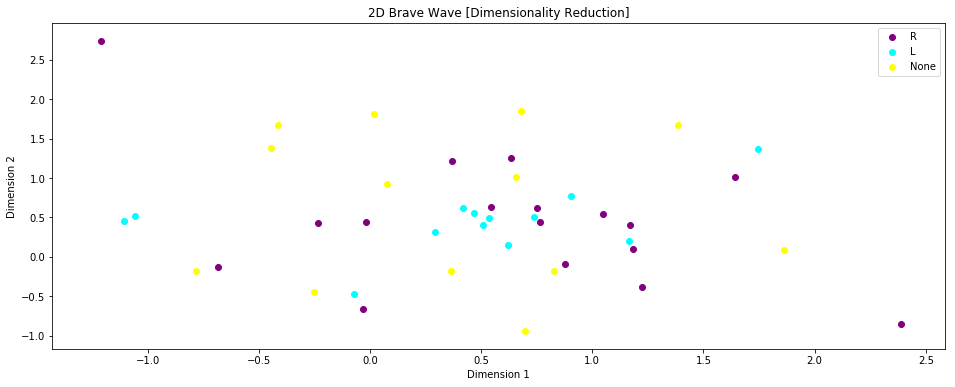

In [8]:
xCombined = np.vstack((x_train, x_test))   #shape of xCombined is (43,2000)
yCombined = np.hstack((y_train, y_test))   #shape of yCombined is(43,)    
loc = scaledown(xCombined, n = len(xCombined), randTime = 10, iterate = 1000, rate = 0.1, verbose = 1)

x = loc[:,0]
y = loc[:,1]
c = yCombined

fig = plt.figure()
ax = fig.add_subplot(111)
labels = ["R", "L", "None"]
colors = ('purple', 'cyan', 'yellow')
labelsList = []
for idx, cl in enumerate(np.unique(y)):
    # there are only three values (0, 1, 2) in c (yCimbined), thus only three colors exist (purple， cyan， yellow)
    if c[idx] not in labelsList:
        
        sc = ax.scatter(x[idx], y[idx], c = colors[int(c[idx])], marker='o', label = labels[int(c[idx])])
        labelsList.append(int(c[idx]))
    else:
        sc = ax.scatter(x[idx], y[idx], c = colors[int(c[idx])], marker='o')
ax.set_title('2D Brave Wave [Dimensionality Reduction]')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend( loc = "upper right")
plt.gcf().set_size_inches((16, 6))
plt.show()

Each event is composed of about 2,000 brainwave values, thus, it is difficult to visualize the classifier. Initially we tried to directly visualize without the dimension reduction processing, which meant that the algorithm needed to traverse all the values of each event, resulting in an HD image. However, this method is arduous and does not result in a high enough accuracy.

Therefore, in order to reduce time consumption of this method we considered using dimensionality reduction techniques. Its core technology is Euclidean space and distance, the distance between pairs of points in Euclidean spaces (the three or higher-dimensional generalizations space of Euclidean geometry). With the formula $(∑(pi-qi)^2)^{0.5}$. 

In the iteration, the error rate (*errorrate*) was calculated based on the fake distance (*fakedist*) and real distance (*realdist*), and then was scaled down using *errorate*. This calcualted, the new minimum error (*minerror*), the latest error (*lasterror*) and the most suitable dimensionality reduction location (*finalbestloc*). When the iteration finishes, the *scaledown()* algorithm obtains the most suitable position and returns it in *loc* variable. The scatterplot after dimensionality reduction has three colours representing purple: Right, cyan: Left, and yellow: No movement, respectively and the 43 points in the figure represent 43 eye movement signals.

### <font color='#003399'>Model Selection</font>

Our team decided to try different classification models in order to find the best one that we could apply to our Space Invaders. Meaning that we had to evaluate and compare the performance of each model. After that, we selected two classification methods that we implemented into our game. The following models where selected:

* A Random Forest classification with 100 trees and setting the Forest to bootstrap sampling to build these trees

* 3-Nearest Neighbours because we assumed there are 3 groups: Left, Right and None events. We also tried 5NN but agreed on not to include into this work

* Support Vector Machine where we used the default kernel function (rbf or Gaussian radial basis function).

* We also wrote our own classifier that can be found in the data folder as *Classifier1.py*. Concept:

 - Normalising the wave to mean  0 and set up a boundary in a way that either all of the data points are within the boundary or at least 80%
 - Trim the wave, leaving points out that are within the boundary
 - Determine whether the max or min ampltitude of the wave came first and determing left or right from that.

These classification models were written using python and sklearn package.


In [9]:
def plotDecisionRegions(X, y, classifier, resolution, testId, position):
    # Draw the decision boundary where X is feature and y is the label list. 
    # Initializes markers and their color.
    
    
    markers = ('D', '^', 's')
    colors = ('blue', 'green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1Max, x1Min = X[:, 0].max() + 1, X[:, 0].min() - 1   # The first eigenvalue represents the x axis
    x2Max, x2Min = X[:, 1].max() + 1, X[:, 1].min() - 1   # The second eigenvalue represents the x axis
    
    x1, x2 = np.meshgrid(np.arange(x1Min, x1Max, resolution), np.arange(x2Min, x2Max, resolution))  # The reolution is grid partitioning granularity, x1 and x2 array have the same dimension
    Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)   # The ravel() function is the flattening of several arrays; The function of Z is to predict two features of the combination
    Z = Z.reshape(x1.shape)   # Z is the column vector
    
    plt.subplot(1,3,position)
    
    if position == 1:
        plt.title("Random Forest", fontdict={'fontsize':18})
        
    elif position == 2:
        plt.title('3-Nearest Neighbours', fontdict={'fontsize':18})
        
    else:
        plt.title('Support Vector Machine', fontdict={'fontsize':18})
        
    plt.xlabel('Dimension 1', fontdict={'fontsize':14})
    plt.ylabel('Dimension 2', fontdict={'fontsize':14})
    
    plt.gcf().set_size_inches((16, 6))
    plt.contourf(x1, x2, Z, alpha = 0.3, cmap = cmap)  # Contourf (x1, x2, Z) where x1 and x2 are two isometric one-dimensional arrays, Z is a two-dimensional array, and each pair of x1, x2 has a correspondence with Z.
    
    # Use different colors to fill the area between the contuour lines
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    
    labels = ["R","L","None"]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), alpha = 0.6, marker = markers[idx], label =labels[idx])   # According to different features (x, y), use different shapes and colors to draw point in the scatter plot
    
    # highlight test samples
    if testId:
        # plot all samples
        X_test, y_test = X[testId, :], y[testId]
        
        plt.scatter(x = X_test[:, 0], y = X_test[:, 1], c = '', edgecolors = 'black', alpha = 1.0, s = 65, marker = 'o', linewidths = 2, label = 'test set')   # Set the test cases shape and color

### <font color='#003399'>Initial Observation of Models</font>

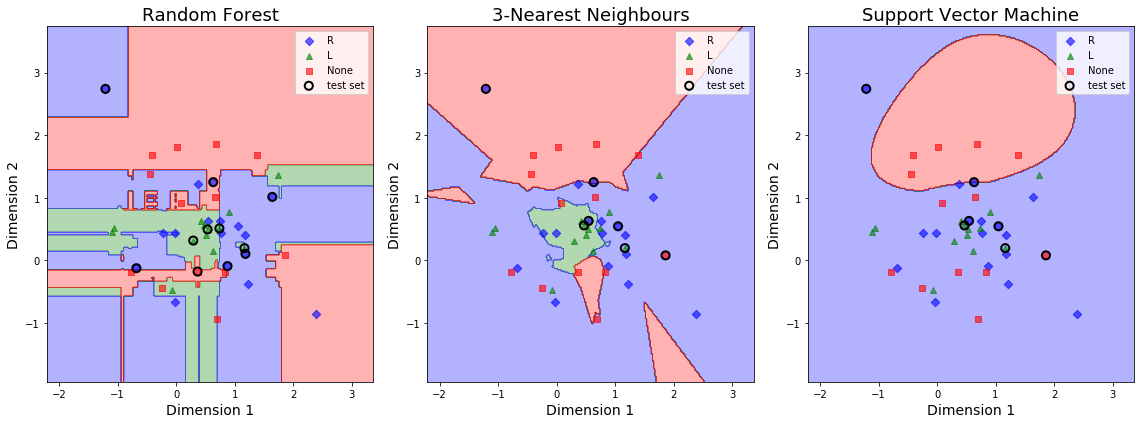

In [10]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


x_train, x_test, y_train, y_test = train_test_split(loc, c, test_size = 0.25, random_state = 10)



modelRF = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = "sqrt")
modelRF.fit(x_train, y_train)
plotDecisionRegions(loc, c, classifier = modelRF, resolution = 0.02, testId = range(32, 43),position=1)  # test id is from 28 to 34
plt.legend(loc='upper right')

plt.tight_layout()


modelKNN = KNeighborsClassifier(n_neighbors = 3)
modelKNN.fit(x_train, y_train)
plotDecisionRegions(loc, c, classifier = modelKNN, resolution = 0.02, testId = range(28, 35),position= 2)
plt.legend(loc='upper right')
plt.tight_layout()


modelSVM = SVC()
modelSVM.fit(x_train, y_train)

plotDecisionRegions(loc, c, classifier = modelSVM, resolution = 0.02, testId = range(28, 35),position= 3)
plt.legend(loc='upper right')
plt.tight_layout()



After successful dimensionality reduction, we obtained a two-dimensional array (*loc*) with a group length of 43. Each sub-array is composed of x and y and represents the corresponding eye movement. Use the *train_test_split()* function to decompose two-dimensional array (*loc*) and eye movement labels (c) into *x_test*, *x_train*, *y_train* and *y_test* where x means loc and y means labels. Machine learning Random forest, K-nearest neighbour (k = 3) and Support vector machine training these sets and get the corresponding classifiers. 

In order to visualize these models and make them easier for users to understand, one should call the *plotDecisionRegions()* function which will plot the decision surface and eye event points. In order to plot the decision surface, we need to compute the eigenvalues (*x1Max, x1Min, x2Max, x2Min*) and then use the input classifier to get the prediction decision surface (Z). Use *plt.contourf()* function to draw area Z, *plt.xlim()* and *plt.ylim()* fill the area between the contour lines with different colours. Next, use the *plt.scatter()* function to show the points of the training set and the test set.

### <font color='#003399'>Evaluation Method</font>

When it comes to performance, we considered performance under two situations: performance on existing and live data. This is important as when the user plays the game, the length of the wave differs and we have to determine what section of the wave we want to read while playing.

Therefore, in the first situation, with the existing data, we perform 5-Cross Fold Validation 50 times, train the model and test the accuracy of each classification on 25% of the existing data. We also use the bootstrapping method when it came to sampling to enhance the result. As we do the 5-CV 50 times, we calculate both the overall accuracy and the F1-score. We then plot the result with a boxplot to make a conclusion. Note that the data we are working with is normalised using the sklearn preprocessing function so the mean becomes 0 and unit variance. For each event we read, we also down sample the event and select every 5th value in the window to save computational time.

Additionally, we also have a wave file that has mixed events. With that file, we will calculate the accuracy of the classifiers under streaming condition. By iterating through the wave window by window (read every 2 seconds of the wave), each model will predict the event within that time frame. We decided to choose 2 seconds because the game itself updates the spaceship’s position every 2 seconds.

After having the sequence of prediction for the models, we use SequenceMatcher function from the package difflib. This function finds the longest common sequence in the sequence of prediction and actual labels. The function also allows us to estimate the accuracy of the models.

In the end, we select two models according to the observations and apply them to the game. That means we try 2 classifiers and see how they perform with the game.


## Performance

### <font color='#003399'>Performance On Existing Data</font>

In [11]:
modelRF1 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt")
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC()

In [12]:
rf1_result_acc =[]
rf1_result_f1 =[]

knn_result_f1 =[]
knn_result_acc =[]

svm_result_acc =[]
svm_result_f1 = []

g_result_f1 = []
g_result_acc =[]

n = 50

In [13]:
for i in range(n):
    
    df_cross = df.sample(frac=1, replace=True)
    labels_cross = df_cross['class'].astype(int)
    df_cross = df_cross.drop(['class'], axis ='columns')
    
    f1_rf1 = np.mean(cross_val_score(modelRF1, df_cross, labels_cross, cv=5, scoring='f1_macro'))
    acc_rf1 = np.mean(cross_val_score(modelRF1, df_cross, labels_cross, cv=5))
    
    f1_knn = np.mean(cross_val_score(knn, df_cross, labels_cross, cv=5, scoring='f1_macro'))
    acc_knn = np.mean(cross_val_score(knn, df_cross, labels_cross, cv=5))
    
    f1_svm = np.mean(cross_val_score(svm, df_cross, labels_cross, cv=5, scoring='f1_macro'))
    acc_svm = np.mean(cross_val_score(svm, df_cross, labels_cross, cv=5))
    
    rf1_result_acc.append(acc_rf1)
    rf1_result_f1.append(f1_rf1)
    
    knn_result_f1.append(f1_knn)
    knn_result_acc.append(acc_knn)
    
    svm_result_acc.append(f1_svm)
    svm_result_f1.append(acc_svm)
    
    
    
    

In [14]:
for i in range(n):
    
    kf = KFold(n_splits=5, shuffle=True)
    
    g_fold_acc = []
    g_fold_f1 =[]
    
    for train, test in  kf.split([i for i in range(len(df))]):
        x_train, x_test, y_train, y_test = df_original.loc[train], df_original.loc[test], labels_original[train], labels_original[test]
        
        
        predictedList = []
        
        for j in test:
            predicted = Classifier(list(x_test.loc[j]))
            
            if "L" in predicted:
                predicted = 1
            elif "R" in predicted:
                predicted = 0
            
            else:
                predicted = 2
                
            predictedList.append(predicted)
            
        #print(len(y_test), len(predictedList))
        g_fold_acc.append(metrics.accuracy_score(list(y_test), predictedList))
        g_fold_f1.append(metrics.f1_score(list(y_test), predictedList, average='macro'))
        
    g_result_acc.append(np.mean(g_fold_acc))
    g_result_f1.append(np.mean(g_fold_f1))
        
            
            

In [15]:
result_f1 = []
result_acc = []


result_f1.append(rf1_result_f1)
result_f1.append(knn_result_f1)
result_f1.append(g_result_f1)
result_f1.append(svm_result_f1)

result_acc.append(rf1_result_acc)
result_acc.append(knn_result_acc)
result_acc.append(g_result_acc)
result_acc.append(svm_result_acc)

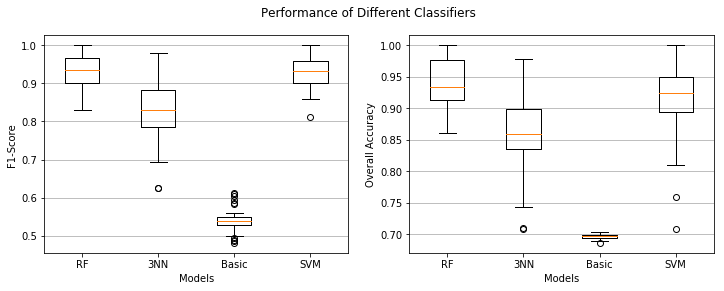

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (12,4))

ax[0].boxplot(result_f1)
fig.suptitle('Performance of Different Classifiers')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('F1-Score')
xticklabels=['RF', '3NN', 'Basic', 'SVM']

ax[0].set_xticklabels(xticklabels)

# add horizontal grid lines
ax[0].yaxis.grid(True)
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')

ax[1].boxplot(result_acc)
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Overall Accuracy')


ax[1].set_xticklabels(xticklabels)

# add horizontal grid lines
ax[1].yaxis.grid(True)

#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

### <font color='#003399'>Performance Under Streaming Conditions</font>

In [17]:
testWave = np.load("./data/group_wave/RLRLLRLLRRRLLLRLRRRR.npy")
label_test = ["R","L","R","L","L","R","L","L","R","R","R","L","L","L","R","L","R","R","R","R"]
time = [i/10000 for i in range(len(testWave))]

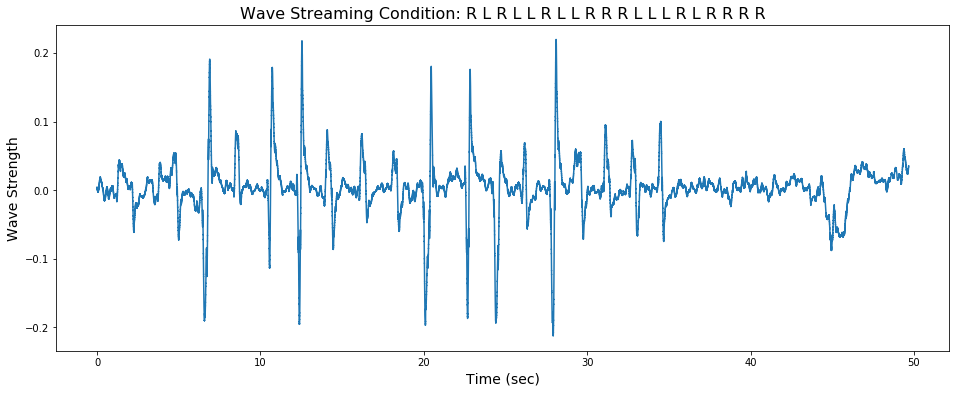

In [18]:
plt.figure(num=None, figsize=(16,6))

plt.plot(time, testWave)
plt.title("Wave Streaming Condition: R L R L L R L L R R R L L L R L R R R R", fontdict={'fontsize':16})
plt.xlabel("Time (sec)", fontdict={'fontsize':14})
plt.ylabel("Wave Strength", fontdict={'fontsize':14})
plt.show()

In [19]:
def reduceWave(wave):
    
    wave = np.array(wave[-10000:],dtype=np.float32)
    
    return [wave[i] for i in range(len(wave)) if i % 5 == 0]



In [20]:
result_knn = []
result_rf =[]
result_svm = []
result_g = []


knn.fit(df.iloc[:,:-1], list(df['class']))
modelRF1.fit(df.iloc[:,:-1],list(df['class']))
svm.fit(df.iloc[:,:-1], list(df['class']))

rangeWave = int(len(testWave)/10000)

for i in range(1,rangeWave-1):
    beginning = (i-1)*10000+5000
    end = i*10000+5000
    tempWave = testWave[beginning:end]
    
    reducedWave = reduceWave(tempWave)
    
    predict_knn = knn.predict([reducedWave])
    
    
    if predict_knn != 2:
        if predict_knn == 0:
            result_knn.append("R")
            
        else:
            result_knn.append("L")
        
    predict_rf = modelRF1.predict([reducedWave])
    
    if predict_rf != 2:
        if predict_rf == 0:
            result_rf.append("R")
            
        else:
            result_rf.append("L")
        
    predict_svm = svm.predict([reducedWave])
    
    if predict_svm != 2:
        if predict_svm == 0:
            result_svm.append("R")
            
        else:
            result_svm.append("L")
        
        
    result_g.append(Classifier(tempWave)[0])
    

In [21]:
print("KNN Accuracy Streaming Condition: "+str(difflib.SequenceMatcher(None, label_test, result_knn).ratio()*100))
print("RF Accuracy Streaming Condition: "+str(difflib.SequenceMatcher(None, label_test, result_rf).ratio()*100))
print("SVM Accuracy Streaming Condition: "+str(difflib.SequenceMatcher(None, label_test, result_svm).ratio()*100))
print("Basic Accuracy Streaming Condition: "+str(difflib.SequenceMatcher(None, label_test, result_g).ratio()*100))

KNN Accuracy Streaming Condition: 11.940298507462686
RF Accuracy Streaming Condition: 51.515151515151516
SVM Accuracy Streaming Condition: 0.0
Basic Accuracy Streaming Condition: 29.850746268656714


## Result

### Physics

After the Fourier filter was developed and a clean signal was achieved, the positioning of the electrodes on the forehead was investigated to find the position that produced the cleanest signal. Position 2 as shown in figure b produced the clean signal. This position was thus used for the remainder of the experiment.

The filter was adapted to run live and filter a live data stream, producing a live stream of filtered signal. The live filter was created in MATLAB and converted into python code to integrate with the other game components. The filter was run on a loop and a window was read from the stream, filtered and added to a total data vector every iteration. In the first iteration, three windows were read. The second half of the first, the whole second window and the first half of the third window were Fourier filtered and the resulting middle window was added to the total data vector. On each following iteration, a new window was read, the two previous windows were kept stored from previous iterations and the filter process was conducted similarly to the first iteration.

The filter was then converted to a python function (find in *filter.py*), which took a total stream time as an input and returned a filtered vector of the stream for the specified length of time. This filtered signal vector output was used as input for the classification process.


### Data Science

It can be seen from the Dimensional reduction figures that in the random forest technique, all test cases are in the surface Z of the corresponding colour, which means that the RF model is relatively accurate. Neither KNN nor SVM can predict eye movement very well, because both test cases are not in the corresponding area Z. Therefore, our initial conclusion is to use RF to predict eye movements.

After the data pre-processing and model selection, we run the performance test of 5 CV fifty times and plotted boxplots for both overall accuracy and F1-score. Accuracy for streaming condition was also displayed to observe the differences.

Looking at the boxplots created, we can see that the Random Forest performed the best with over 90% accuracy and F1-score. It seems like our basic classifier did not do so well while the KNN and SVM performed quite well. Yet, looking at the evaluation of the streaming condition, there is a significant difference in accuracy. The basic classifier performed the second best while SVM and KNN performed significantly worse. Random Forest is still perforning the best, however, looking at the numbers, none of the classifiers performed as well as previously.

We can also compare the two boxplots and see there is not much of a difference between the F1-score and overall accuracy. That could be because we have relatively balanced data. There are also some outliers in the plots but the values are still over 70-75%.

With that in mind, we implemented the basic classification model as well as the Random Forest model into our game to see how they do in action. The models read the last 10000 points of the wave, trim it and classify that window. Although we were able to merge them with the game, based on the game experience, we stuck with the basic classifier.

### Deployment

First, we set up a GitHub repository https://github.sydney.edu.au/mile3901/DATA3888-PHYS3888 in order to share our work and collaborate in the end. Every code - such as filter, classification - video and wave data are stored here. Note that during the project, we split the groups into two smaller teams, where one team worked on the classification model, while the other worked on the game itself. It was important that both team had Physics and Data Science students in order to cover the shortcomings in knowledge of each individual. Because of that, we were able to smoothly merge our work without conflict (e.g. understanding the filter of the Spike Box and how the classification works, we adjusted the update time of positions for the objects within the game).

The team also had separate python files for each part of the work – such as classification.py for Random Forest model, Classifier1.py for the Basic classifier or filter.py for the Spike Box filtering. With this, it was always easy to track issues within the code and fix them without creating problems in other parts of the game.

As everyone finished their part of the work, the team came together to discuss how we executed the plan and finally put the codes together and tested it. As we only had one Spike Box and the COVID-19 climate, only one of us was able to do the test and give feedback. With that, adjustments were made before the final deployment.


### <center>Losing Scenario</center>

In [22]:
Video('./death.mp4')


### <center>Winning Scenario</center>

In [23]:
Video('./win.mp4')

## Discussion

The first shortcoming would be the simplicity of the game as the spaceship can only move  to left or right to dodge asteroids based on the users’ eye movements. Potential improvement can be result from adding new features, for instance, the user can fire the missiles to destroy the asteroids when they blink their eyes twice.

The second shortcoming comes as a result of the game being suited only to the Physcis student who was recording the data, as the classifer was trained based on his data. If the game was attempted by another, the same experience may not result. In the future, we could train the model on a number of people so that we can create a more general model that works for most. Unfortunately, this would take a considerably long time and the accuracy will not be the same for all.

Additionally, the game updates the position of the space ship quite slowly as this time is required to read and process the wave. To improve this, faster algorithms can be used in the future to increase the updating time. Furthermore, the rules of the game are not flexible as the width of the screen is already set to a specific frame and the asteroid number is also set. This can result in a hindered gaming experience due to the abscence of variety. Potential improvement can be redesigning the game based on the user feedback.

In reference to data science, shortcomings result from a small data size of only 43 points. In the future more data points should be collected. before conducting the analysis and training. Further, the methods used to train the models may not be sufficient, for example, the SVM used is based on the defaut kernels. Other Kernel functions can also be applied e.g. Fisher and Polynomial. Additionally, other values for K can be used to compare accuracies. 

Finally, the current model works pretty well with the existing datasets but when we try under the streaming condition, the performance is not that satisfactory. Thus, we may try reading a larger or smaller window size in the future, or figure out new ways to determine the events and ensure that the event is within the window we are reading now.

### Conclusion

The final project we produced is a Space Invaders style game based on eye movements. In this interdisciplinary project, 4 data science students and 2 physics students collaborated to produce the final product. The data students mainly focused on the classification, model training and accuracy examination, and physics students focused on collecting data from the EOG and ensuring the signal is clear and recognizable.

Based on our experiments on applying a number of evaluation techniques, we applied different classifiers in the game and decided to use the basic classification model and the Random Forest model into our game. Due to the playing experience, the basic classifier was ultimately selected to apply.

## Individual Contribution

### 480441423

* Initially I assigned myself the role of minute taker so took meeting minutes for each group meeting and uploaded the progress each week. 

* For both the initial ‘Project Report’ presentation and the final presentation I designed the format and helped create a cohesive slide show. 

* For the ‘Project Report’ presentation I contributed through working on the Introduction, Timeline, Extension of our Project and conclusion. 

* When developing each of our classifiers I created a simple classifier: The classifier worked by, firstly identifying when an event was occurring by establishing boundaries of increasing size to determine the occurrence of an event. Secondly it worked to classify each left and right eye movement by determining weather the maximum of the wav of the minimum of the wav came first. 

* For the ‘Final Presentation’ I worked solely on the presentation as opposed to the demonstration, I worked on the background, data collection method and conclusion. 

* Finally, for the report I worked on the Aim and Background and was assigned to be the editor when it came to making our report read well. 


### 470481293

*	Generated SVM and KNN model, and tested the accuracy for the non-live data in the early stage, but the accuracy is not very high. 
*	Processed and Tested 480387626’s wave files on the in the early stage
*	Trained on 480387626's live data, and tested SVM and KNN Model in the early stage
*	Record the video of game demonstration with physics student together and edit it to make it presentable. 	
*	Coordinate with physics students to put the data collection of physics part, after I summarized it, into the report 
*	Write the aspects of data science for the data collection in the final report
*	Write the Shortcoming and improvements part in the final report
*	Write the conclusion part in the final report

### 470182312

* In the initial discussion, I put forward suggestions on the rules of the game so that it can receive brainwave signals once every 1.2 seconds. It reduces noise interference and lets models can process complex real-time brainwaves and produce highly accurate predictions.

* When creating a suitable classifier model, I used *robjects.r.source()* to try to run R and python at the same time. Train the model by 25 times 5-fold cross-validation RF through machine learning, save as RFmodel.pickle. When the game is running, use *pickle_in = open('../data/group_model/RFmodel.pickle', 'rb')* and *rfc = pickle.load(pickle_in)* to call the RFmodel and makes predictions. In the final project, it is time-wasting and cannot meet the basic needs of the game, so it is not shown in report and GitHub.

* Help team member 480133780 to check and improve the operation of classifier, add data and analyze, generate more accurate RF, KNN, SVM and basic models.

* In the final report, I used the dimensionality reduction technique Euclidean spaces to get all the eye movements (x, y) and scatter to visualize them. Finally, use the above (x, y) and machine learning RF, KNN, and SVM to get a map of prediction decision surface.

* wrote the dimensionality reduction and model selection parts

### 460360887

460360887 worked on the initial implementation of the Fourier filter and live processing in MATLAB with 480387626. They worked on the initial code to detect deflections and mark events as either left or right in the initial MATLAB code. They worked with the rest of the team to design the game and simplify it so it could be controlled via eye movements. 460360887 created the background image, pause screen, finish screen and finish line for the game. They also created the code to randomly generate the asteroids that appeared on the screen as well as control the density of the asteroids and the speed that the game runs at. 460360887 also added code to detect the collisions with the asteroids and go to the game over screen and added code to detect when the finish line was reached and go to the finish screen. They also did some QA and fixed various bugs in the game code. In the final presentation 460360887 recorded a voice over to the demonstration to describe how to set up and control the game.

### 480387626

480387626 helped in the initial design of the Fourier filter and the live filter and data stream, along with 460360887. He conducted position testing to evaluate the optimal positioning of the device on the user’s head. After the university shut down due to coronavirus, 480387626 took the Spikerbox and performed all data recording and live testing for the rest of the experiment. 480387626 improved and optimised the live filter and adapted the output to a continually updating vector that could be read by the classifier. He removed edge effects on the live filter. 480387626 translated the live filter code from MATLAB to python to integrate it into the final game which ran in python. He provided recorded data to the data students for training and testing of the classifier. After the classifiers had been completed, 480387626 tested them and helped decide which classifier would be used in the final product. After the final classifier was chosen, 480387626 modified the classifier and game code to allow for no movement to be recorded when the user does not make a left or right eye movement. 480387626 recorded a demonstration of the Space Battle game for the final presentation.


### 480133780

* Design the game part of the project and distributed task to team members

* Came up with the idea to split the group into two: data team and game design team
    
* I was responsible for creating the game part of the project, specifically the game’s core engine that runs the game and updates the position of the objects.

* Created the spaceship, inserting it into the game and make sure we are able to control it.

* Added Pause button and “Game Over” sign as well as adjusted the background image to the screen size

* Extracted events and none events from Wave datasets

* Helped writing classifiers and evaluation method

* Put the classification code and the game part together

* Wrote the Result part of the report

* Contributed to the Method part of the report

* Contributed to the presentation script and slides

* General team management such as setting up meetings and recording them, following teammates progress and giving a basic direction to the team


## Reference

Brouwer, A., Hogervorst, M., Oudejans, B., Ries, A., & Touryan, J. (2017). EEG and Eye Tracking Signatures of Target Encoding during Structured Visual Search. Frontiers In Human Neuroscience, 11. doi: 10.3389/fnhum.2017.00264
 
Harezlak, K., Kasprowski, P., & Stasch, M. (2014). Towards Accurate Eye Tracker Calibration – Methods and Procedures. Procedia Computer Science, 35, 1073-1081. doi: 10.1016/j.procs.2014.08.194
 
Hooge, I. T. C., Holleman, G. A., Haukes, N. C., & Hessels, R. S. (2019). Gaze tracking accuracy in humans: One eye is sometimes better than two. Behavior Research Methods, 51(6), 2712–2721. https://doi.org/10.3758/s13428-018-1135-3
 
 
Zhang, X., Liu, X., Yuan, S., & Lin, S. (2017). Eye Tracking Based Control System for Natural Human-Computer Interaction. Computational Intelligence And Neuroscience, 2017, 1-9. doi: 10.1155/2017/5739301
